TASK 1

In [1]:
import pandas as pd

PS1 = pd.read_csv('PS1.csv', index_col=0)

print(PS1.head(n=10))

              frame.time_epoch          ip.src          ip.dst  tcp.srcport  \
frame.number                                                                  
1                 1.701377e+09     172.20.10.3  17.248.150.230          NaN   
2                 1.701377e+09  17.248.150.230     172.20.10.3          NaN   
3                 1.701377e+09  17.248.150.230     172.20.10.3          NaN   
4                 1.701377e+09  17.248.150.230     172.20.10.3          NaN   
5                 1.701377e+09  17.248.150.230     172.20.10.3          NaN   
6                 1.701377e+09  17.248.150.230     172.20.10.3          NaN   
7                 1.701377e+09     172.20.10.3  17.248.150.230          NaN   
8                 1.701377e+09     172.20.10.3  17.248.150.230          NaN   
9                 1.701377e+09     172.20.10.3  17.248.150.230          NaN   
10                1.701377e+09  17.248.150.230     172.20.10.3          NaN   

              tcp.dstport  frame.len  
frame.number

PS1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

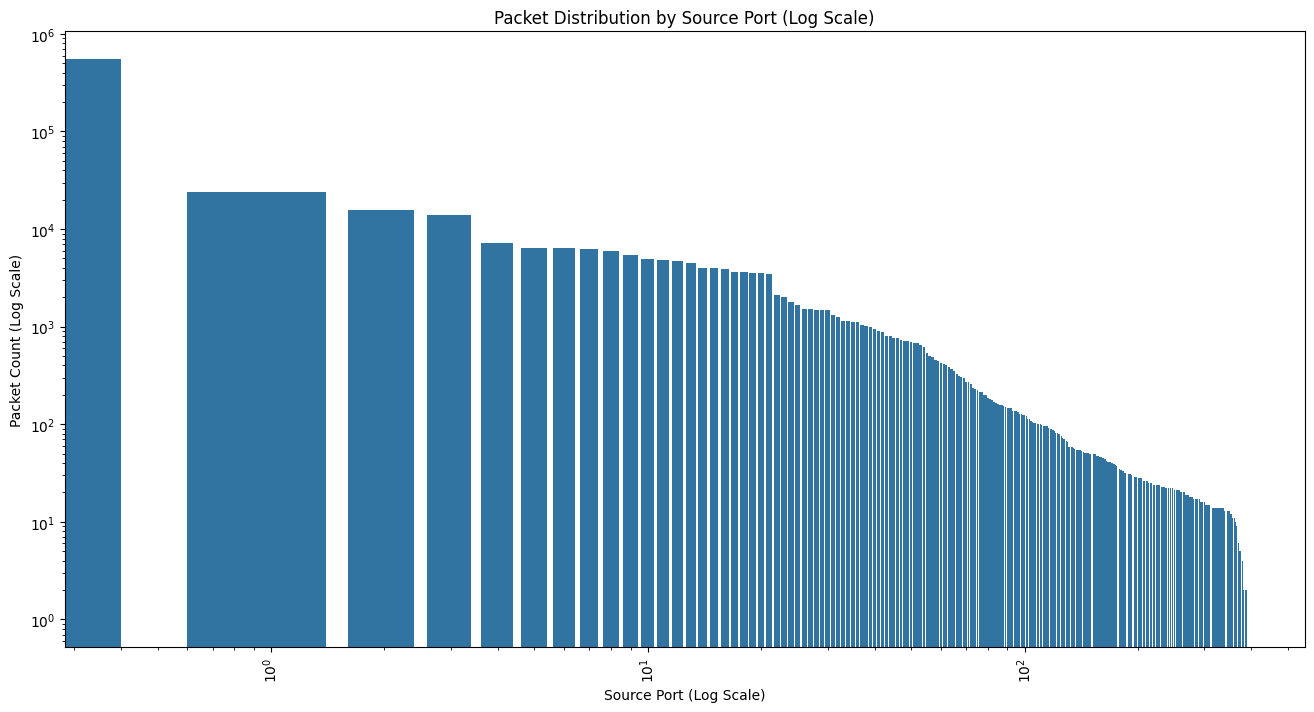

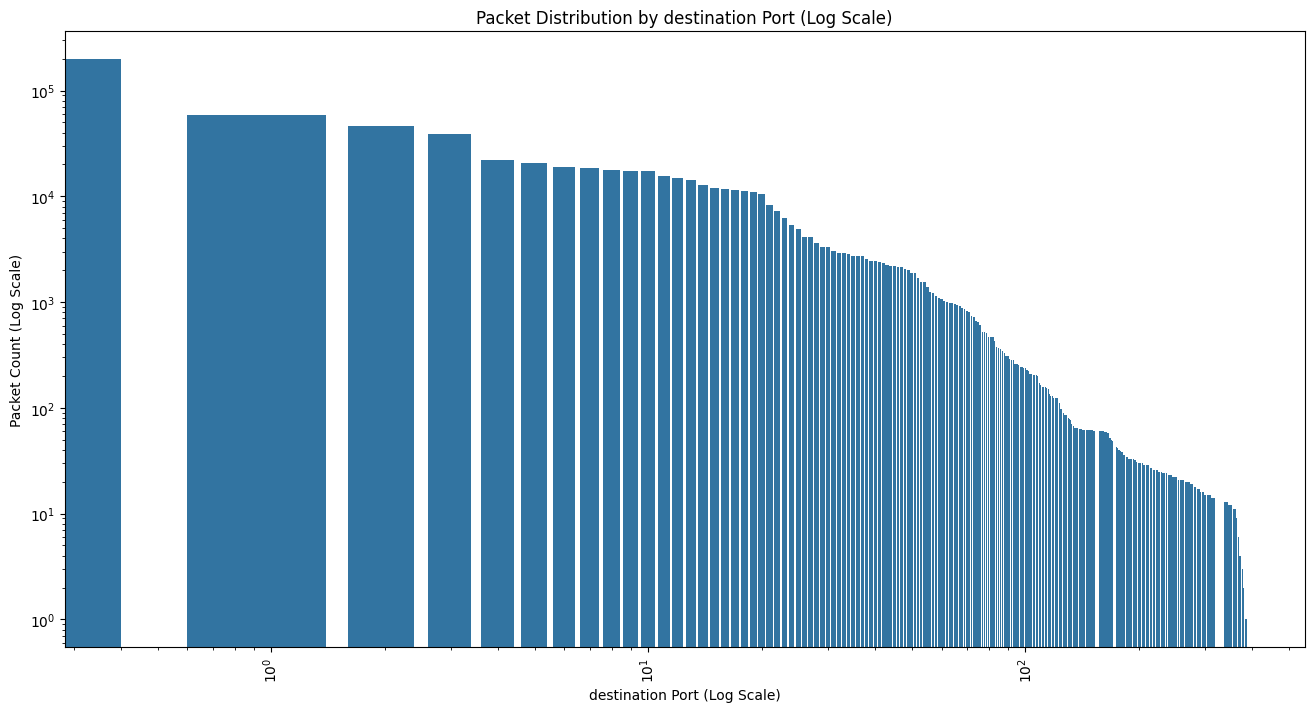

In [3]:
# Convert timestamps to datetime objects
PS1['frame.time_epoch'] = pd.to_datetime(PS1['frame.time_epoch'])

#1.1
plt.figure(figsize=(16, 8))
sns.countplot(x='tcp.srcport', data=PS1, order=PS1['tcp.srcport'].value_counts().index)
plt.title('Packet Distribution by Source Port (Log Scale)')
plt.xlabel('Source Port (Log Scale)')
plt.ylabel('Packet Count (Log Scale)')
plt.xticks(rotation=90)
plt.xscale('log')
plt.yscale('log')
plt.show()


#1.1
plt.figure(figsize=(16, 8))
sns.countplot(x='tcp.dstport', data=PS1, order=PS1['tcp.dstport'].value_counts().index)
plt.title('Packet Distribution by destination Port (Log Scale)')
plt.xlabel('destination Port (Log Scale)')
plt.ylabel('Packet Count (Log Scale)')
plt.xticks(rotation=90)
plt.xscale('log')
plt.yscale('log')
plt.show()

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_730/691543972.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='frame.time_epoch', y='frame.len', data=PS1, estimator='sum', ci=None, ax=ax2, color='green', label='Traffic Volume')


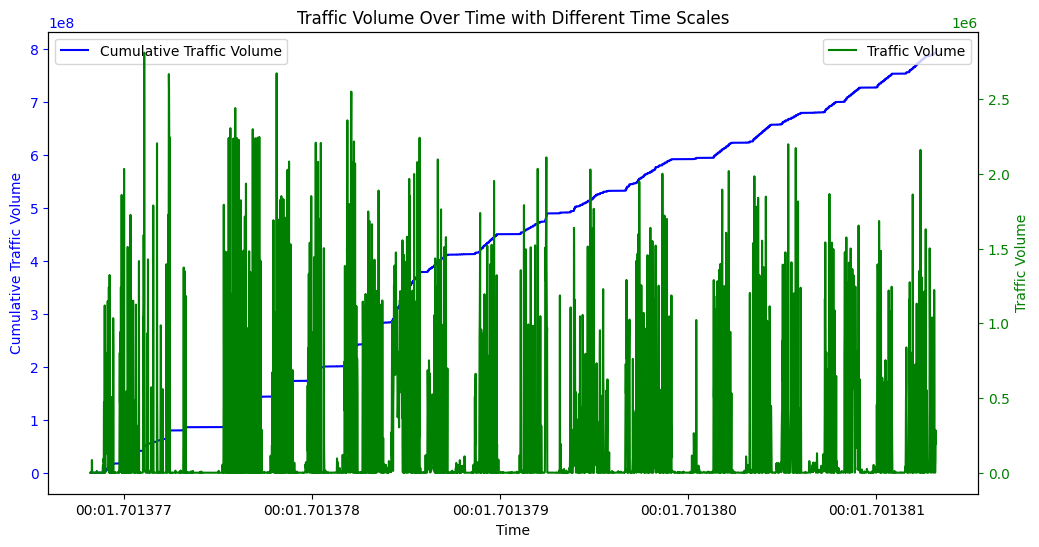

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the cumulative traffic volume over time on the primary y-axis
ax1.plot(PS1['frame.time_epoch'], PS1['frame.len'].cumsum(), color='blue', label='Cumulative Traffic Volume')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cumulative Traffic Volume', color='blue')
ax1.tick_params('y', colors='blue')

# Creating a secondary y-axis with a different time scale
ax2 = ax1.twinx()
sns.lineplot(x='frame.time_epoch', y='frame.len', data=PS1, estimator='sum', ci=None, ax=ax2, color='green', label='Traffic Volume')
ax2.set_ylabel('Traffic Volume', color='green')
ax2.tick_params('y', colors='green')

# Adding legend and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Traffic Volume Over Time with Different Time Scales')

plt.show()


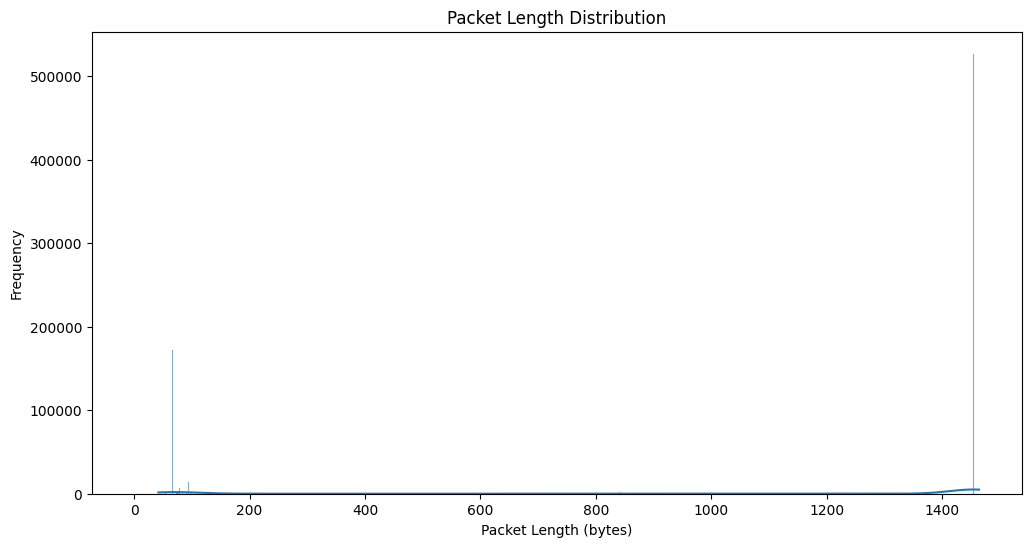

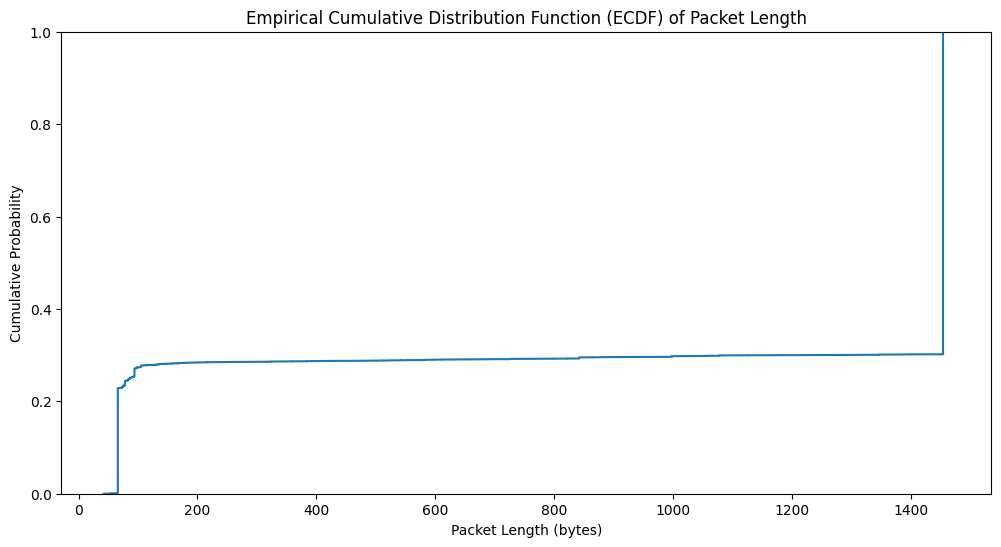

count    754931.000000
mean       1049.208461
std         623.831316
min          42.000000
25%          86.000000
50%        1454.000000
75%        1454.000000
max        1464.000000
Name: frame.len, dtype: float64


In [19]:
# 1.3: Plot packet length distribution
plt.figure(figsize=(12, 6))
sns.histplot(PS1['frame.len'], bins=range(0, PS1['frame.len'].max() + 2, 1), kde=True)
plt.title('Packet Length Distribution')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Frequency')
plt.show()

# 1.3 (cont.): Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize=(12, 6))
sns.ecdfplot(PS1['frame.len'])
plt.title('Empirical Cumulative Distribution Function (ECDF) of Packet Length')
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Cumulative Probability')
plt.show()

# 1.3 (cont.): Key Summary Statistics
summary_stats = PS1['frame.len'].describe()
print(summary_stats)

PS2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geoip2.database
from scipy.stats import gamma
from datetime import timedelta

In [11]:
PS2 = pd.read_csv('PS2.csv')
print(PS2.head(n=10))

        Source IP  Destination IP  Source Port  Destination Port  \
0   17.248.214.65     172.20.10.3          443             53115   
1     172.20.10.3   17.248.214.65        53115               443   
2   17.248.214.65     172.20.10.3          443             53115   
3     172.20.10.3   17.248.214.65        53115               443   
4   17.248.214.65     172.20.10.3          443             53115   
5     172.20.10.3   17.248.214.65        53115               443   
6     172.20.10.3  216.58.211.238        53090               443   
7  216.58.211.238     172.20.10.3          443             53090   
8     172.20.10.3  216.58.211.238        53090               443   
9  216.58.211.238     172.20.10.3          443             53090   

     Start Time      End Time  
0  1.701377e+09  1.701377e+09  
1  1.701377e+09  1.701377e+09  
2  1.701377e+09  1.701377e+09  
3  1.701377e+09  1.701377e+09  
4  1.701377e+09  1.701377e+09  
5  1.701377e+09  1.701377e+09  
6  1.701377e+09  1.701377e+

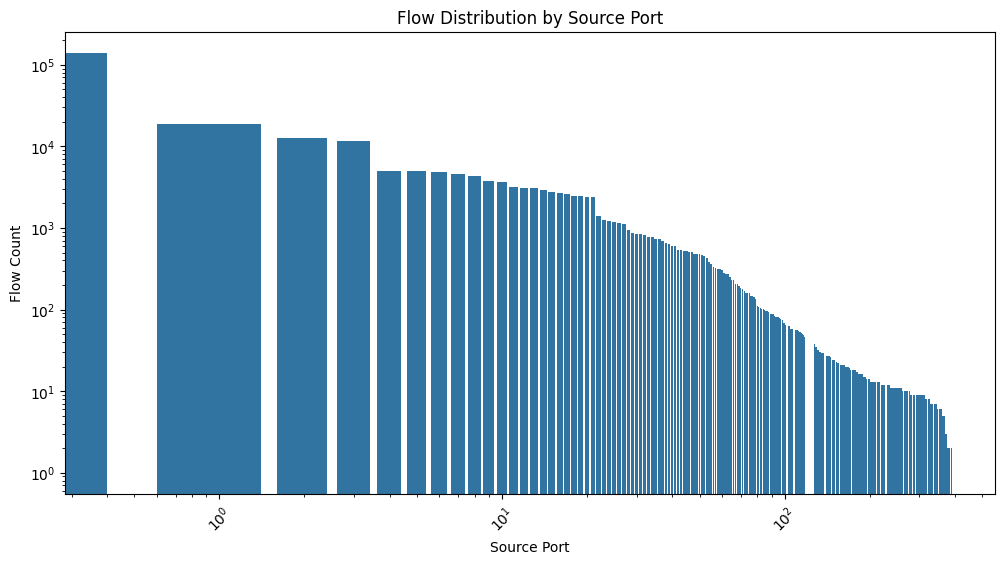

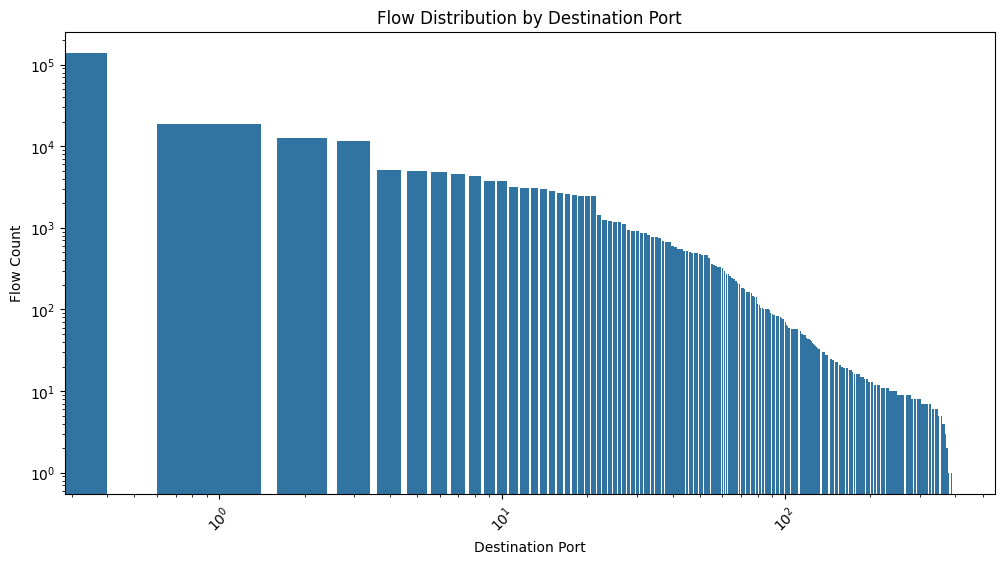

In [3]:
# Convert timestamps to datetime objects
PS2['Start Time'] = pd.to_datetime(PS2['Start Time'])
PS2['End Time'] = pd.to_datetime(PS2['End Time'])

# 1.4: Visualise flow distribution by port numbers
#Source port
plt.figure(figsize=(12, 6))
sns.countplot(x='Source Port', data=PS2, order=PS2['Source Port'].value_counts().index)
plt.title('Flow Distribution by Source Port')
plt.xlabel('Source Port')
plt.ylabel('Flow Count')
plt.xticks(rotation=45)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Destination Port', data=PS2, order=PS2['Destination Port'].value_counts().index)
plt.title('Flow Distribution by Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Flow Count')
plt.xticks(rotation=45)
plt.yscale('log')
plt.xscale('log')
plt.show()

Start Time
2023-11-30 20:40:00      81
2023-11-30 20:41:00    4614
2023-11-30 20:42:00    3377
2023-11-30 20:43:00    5347
2023-11-30 20:44:00    3342
Freq: T, Name: Volume, dtype: int64
Start Time
2023-11-30 20:40:00    16761
2023-11-30 20:45:00    16650
2023-11-30 20:50:00    19879
2023-11-30 20:55:00    13207
2023-11-30 21:00:00    24706
Freq: 5T, Name: Volume, dtype: int64


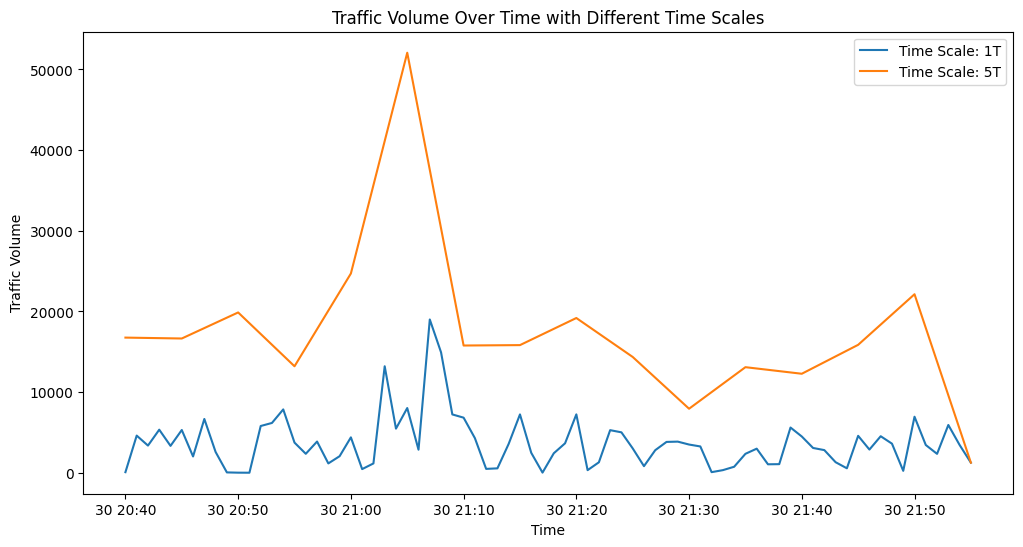

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PS2 = pd.read_csv('PS2.csv')

# Convert timestamps to datetime objects
PS2['Start Time'] = pd.to_datetime(PS2['Start Time'], unit='s')
PS2['End Time'] = pd.to_datetime(PS2['End Time'], unit='s')

# Create a DatetimeIndex
PS2.set_index(['Start Time', 'End Time'], inplace=True)

# Calculate traffic volume for each flow
PS2['Volume'] = 1 

# Reset the index before resampling
PS2_reset = PS2.reset_index()

# Resample the data for different time scales
time_scale1 = '1T'  # 1 minute
time_scale2 = '5T'  # 5 minutes

# Select only the 'Volume' column for summing
traffic_volume1 = PS2_reset.resample(time_scale1, on='Start Time')['Volume'].sum()
traffic_volume2 = PS2_reset.resample(time_scale2, on='Start Time')['Volume'].sum()

print(traffic_volume1.head())
print(traffic_volume2.head())

# Plot traffic volume over time with different time scales
plt.figure(figsize=(12, 6))

# Plot with the first time scale
sns.lineplot(x=traffic_volume1.index, y=traffic_volume1, label=f'Time Scale: {time_scale1}')

# Plot with the second time scale
sns.lineplot(x=traffic_volume2.index, y=traffic_volume2, label=f'Time Scale: {time_scale2}')

# Customize the plot
plt.title('Traffic Volume Over Time with Different Time Scales')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()
plt.close()


In [33]:
#1.6
import pandas as pd
import maxminddb
import plotly.express as px 

geoip_database_path = '/Users/mac/Documents/Msc/Aalto/Internet Traffic /Final_assignmet/GeoLite2-Country.mmdb'  # Replace with the actual path to your GeoIP database file

flow_data = pd.read_csv('/Users/mac/Documents/Msc/Aalto/Internet Traffic /Final_assignmet/PS2.csv')  # Replace with the actual path to your flow data CSV file

reader = maxminddb.open_database(geoip_database_path)

def get_country_info(ip):
    try:
        response = reader.get(ip)
        return response['country']['iso_code']
    except (KeyError, TypeError):
        return None

flow_data['Source Country'] = flow_data['Source IP'].apply(get_country_info)
flow_data['Destination Country'] = flow_data['Destination IP'].apply(get_country_info)

# Define color mapping for specific countries
country_colors = {
    'FI': 'blue',
    'SE': 'yellow',
    'US': 'red',
    'IE': 'orange',
    'DE': 'black'
}

# Create a bar chart using plotly express
fig = px.histogram(flow_data, x='Source Country', color='Source Country', color_discrete_map=country_colors,
                   title='Flow Distribution by Country (Source)',
                   labels={'Source Country': 'Country Code', 'count': 'Flow Count'},
                   category_orders={'Source Country': flow_data['Source Country'].value_counts().index})
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})

# Show the plot
fig.show()

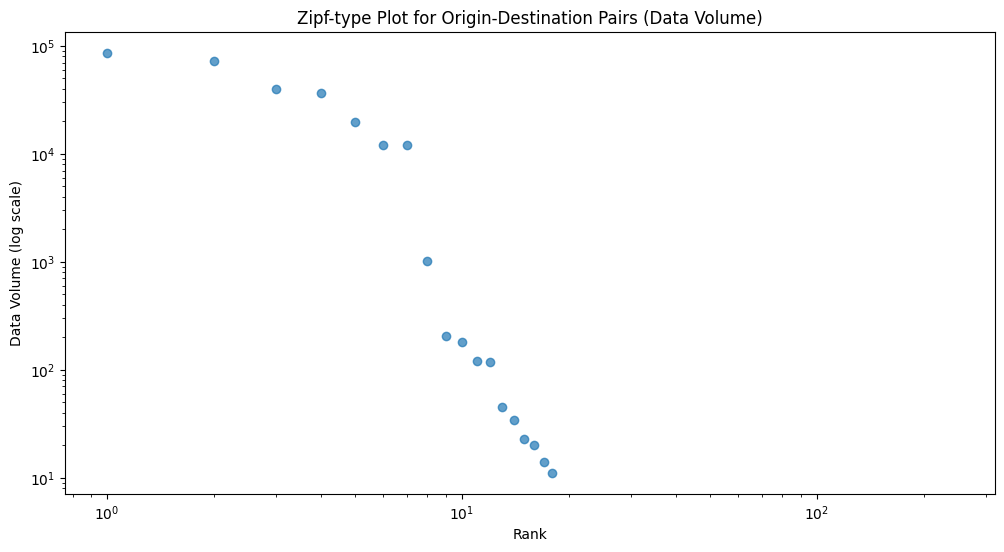

In [9]:
#1.7
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Start Time' and 'End Time' to datetime
PS2['Start Time'] = pd.to_datetime(PS2['Start Time'], unit='s')
PS2['End Time'] = pd.to_datetime(PS2['End Time'], unit='s')

# Calculate traffic volume for each flow
PS2['Volume'] = PS2.groupby(['Source IP', 'Destination IP', 'Source Port', 'Destination Port']).size().reset_index(name='Volume')['Volume']

# Sort the data based on data volume
sorted_flow_stats = PS2.groupby(['Source IP', 'Destination IP']).agg({'Volume': 'sum'}).reset_index().sort_values(by='Volume', ascending=False)

# Plot based on data volume
plt.figure(figsize=(12, 6))
plt.scatter(range(1, len(sorted_flow_stats) + 1), sorted_flow_stats['Volume'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Data Volume (log scale)')
plt.title('Zipf-type Plot for Origin-Destination Pairs (Data Volume)')
plt.show()

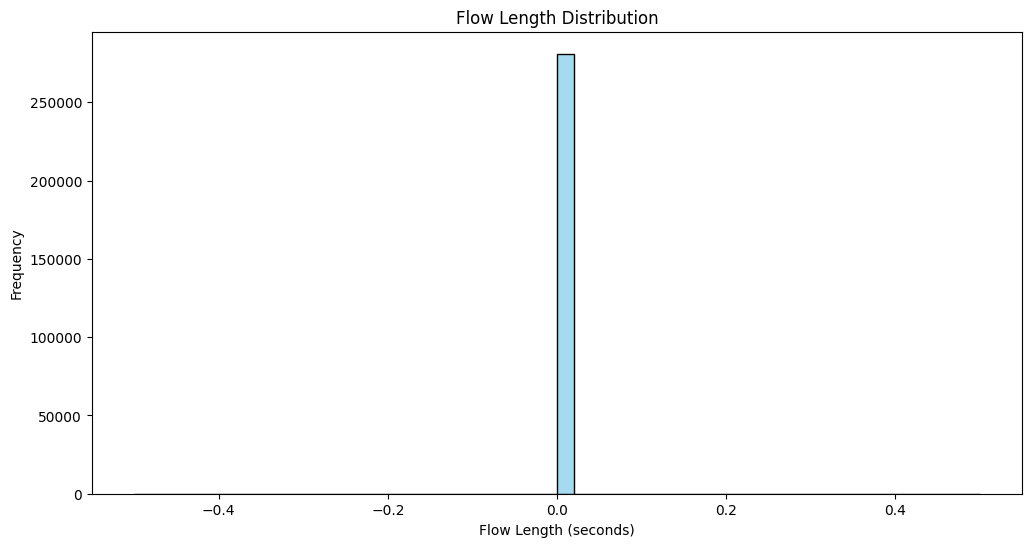

In [12]:
#1.8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert 'Start Time' and 'End Time' to datetime
PS2['Start Time'] = pd.to_datetime(PS2['Start Time'], unit='s')
PS2['End Time'] = pd.to_datetime(PS2['End Time'], unit='s')

# Calculate flow lengths
PS2['Flow Length'] = (PS2['End Time'] - PS2['Start Time']).dt.total_seconds()

# Plot flow length distribution
plt.figure(figsize=(12, 6))
sns.histplot(PS2['Flow Length'], bins=50, kde=False, color='skyblue')
plt.xlabel('Flow Length (seconds)')
plt.ylabel('Frequency')
plt.title('Flow Length Distribution')
plt.show()

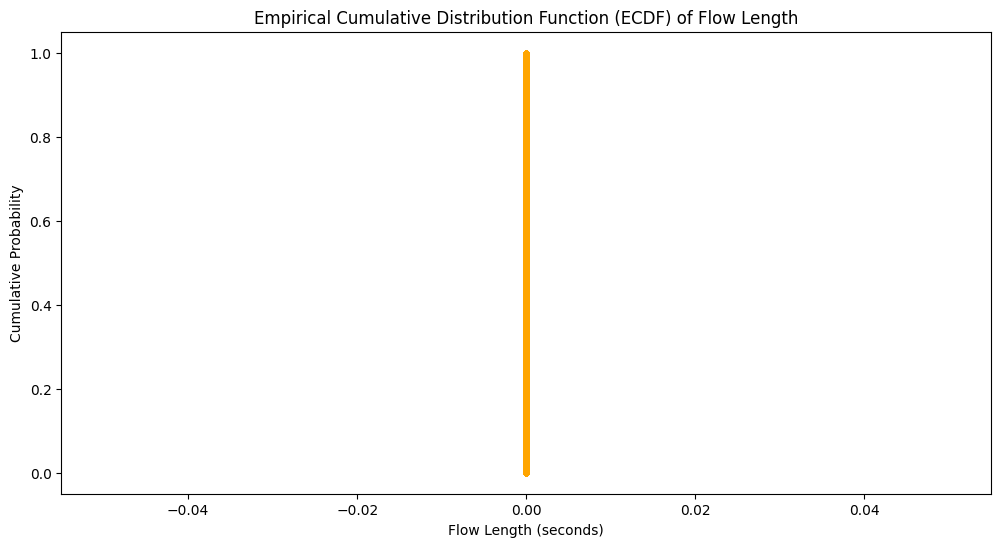

Summary Statistics for Flow Length:
count    281016.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Flow Length, dtype: float64


In [13]:
# Plot empirical cumulative distribution function (ECDF)
sorted_data = np.sort(PS2['Flow Length'])
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(12, 6))
plt.plot(sorted_data, ecdf, marker='.', linestyle='none', color='orange')
plt.xlabel('Flow Length (seconds)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Flow Length')
plt.show()

# Display key summary statistics
summary_stats = PS2['Flow Length'].describe()
print("Summary Statistics for Flow Length:")
print(summary_stats)


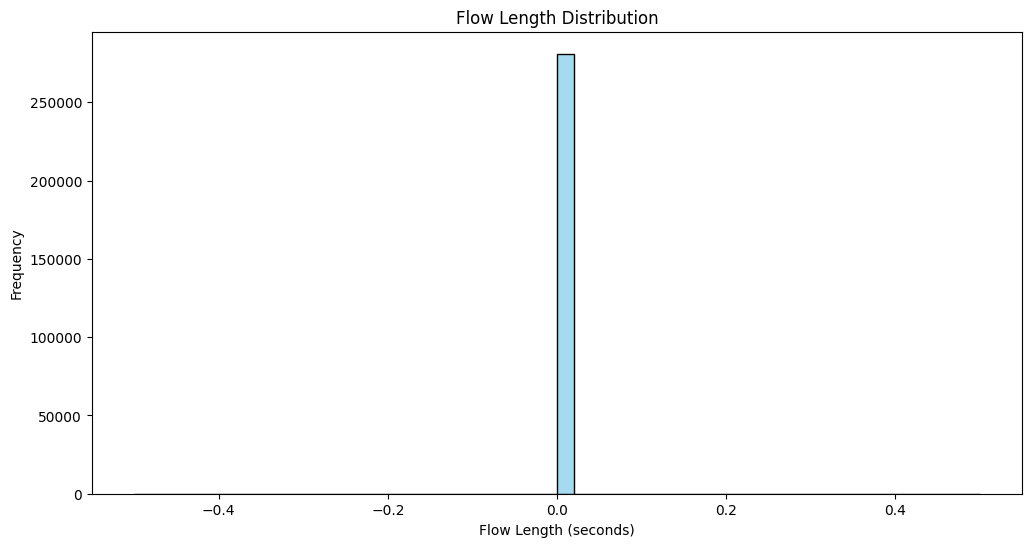

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, ks_2samp
import seaborn as sns

# Convert 'Start Time' and 'End Time' to datetime
PS2['Start Time'] = pd.to_datetime(PS2['Start Time'], unit='s')
PS2['End Time'] = pd.to_datetime(PS2['End Time'], unit='s')

# Calculate flow lengths
PS2['Flow Length'] = (PS2['End Time'] - PS2['Start Time']).dt.total_seconds()

# Plot flow length distribution
plt.figure(figsize=(12, 6))
sns.histplot(PS2['Flow Length'], bins=50, kde=False, color='skyblue')
plt.xlabel('Flow Length (seconds)')
plt.ylabel('Frequency')
plt.title('Flow Length Distribution')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide



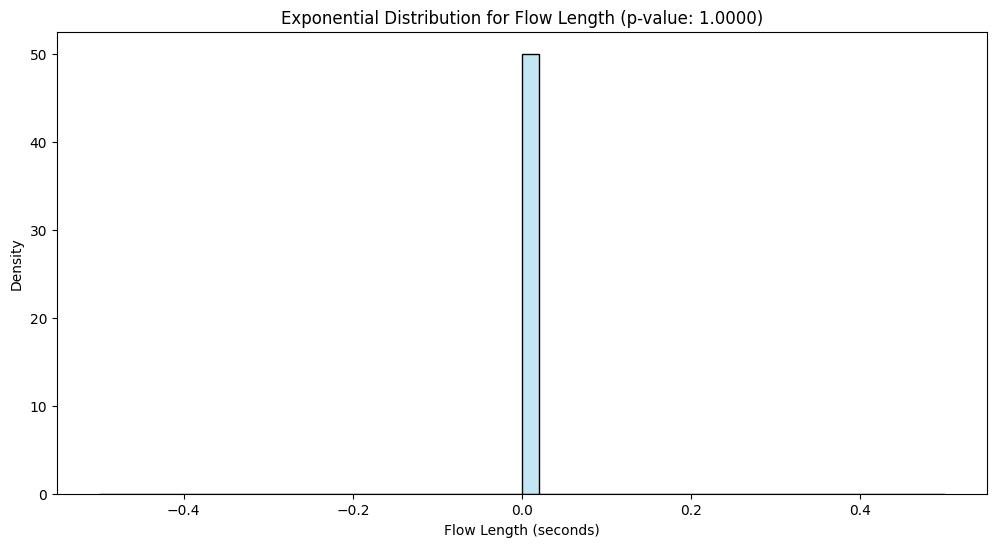

In [22]:
# Fit the exponential distribution and plot
params = expon.fit(PS2['Flow Length'])
_, p_value = ks_2samp(PS2['Flow Length'], expon.rvs(*params, size=len(PS2)))

plt.figure(figsize=(12, 6))
sns.histplot(PS2['Flow Length'], bins=50, kde=True, color='skyblue', stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Exponential Distribution for Flow Length (p-value: {p_value:.4f})')
plt.xlabel('Flow Length (seconds)')
plt.ylabel('Density')
plt.show()

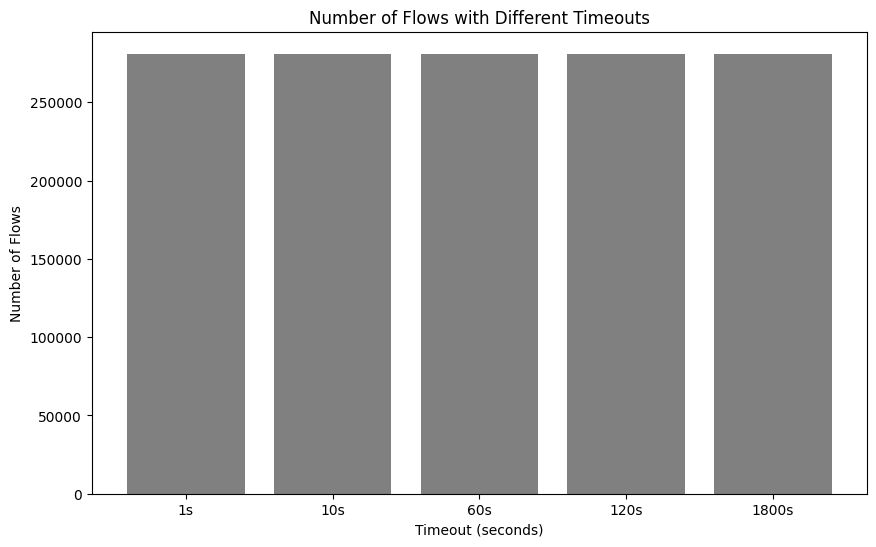

In [32]:
#1.10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to filter flows based on timeout
def filter_flows_by_timeout(flow_data, timeout_seconds):
    filtered_flows = flow_data[(flow_data['End Time'] - flow_data['Start Time']).dt.total_seconds() <= timeout_seconds]
    return filtered_flows

# List of timeouts to compare
timeouts = [1, 10, 60, 120, 1800]

# Number of flows for each timeout
flow_counts = [len(filter_flows_by_timeout(PS2, timeout)) for timeout in timeouts]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar([str(timeout) + 's' for timeout in timeouts], flow_counts, color='gray')
plt.title('Number of Flows with Different Timeouts')
plt.xlabel('Timeout (seconds)')
plt.ylabel('Number of Flows')
plt.show()

PS3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
PS3 = pd.read_csv('PS3.csv', skiprows=8)

# Ensure column names have no leading/trailing whitespaces
PS3.columns = PS3.columns.str.strip()


In [53]:
# Relevant columns for round-trip times and retransmissions
relevant_columns_rtt = ['RTT_avg_a2b', 'RTT_min_a2b', 'RTT_max_a2b', 'RTT_avg_b2a', 'RTT_min_b2a', 'RTT_max_b2a',
                        'rexmt_data_pkts_a2b', 'rexmt_data_pkts_b2a', 'rexmt_data_bytes_a2b', 'rexmt_data_bytes_b2a']

# Create a new DataFrame with relevant columns
analysis_data_rtt = PS3[relevant_columns_rtt]


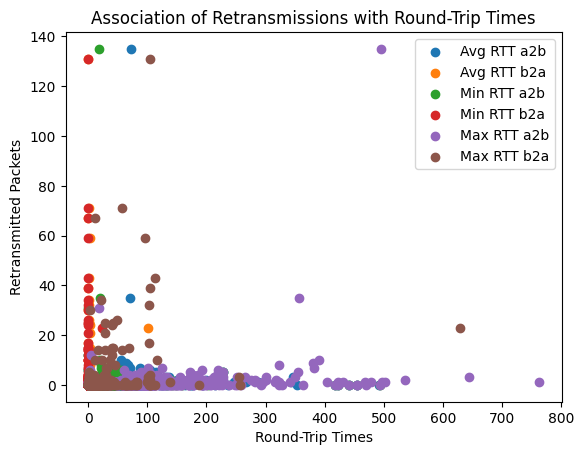

In [54]:
# Scatter plots for association of retransmissions with round-trip times
plt.scatter(analysis_data_rtt['RTT_avg_a2b'], analysis_data_rtt['rexmt_data_pkts_a2b'], label='Avg RTT a2b')
plt.scatter(analysis_data_rtt['RTT_avg_b2a'], analysis_data_rtt['rexmt_data_pkts_b2a'], label='Avg RTT b2a')
plt.scatter(analysis_data_rtt['RTT_min_a2b'], analysis_data_rtt['rexmt_data_pkts_a2b'], label='Min RTT a2b')
plt.scatter(analysis_data_rtt['RTT_min_b2a'], analysis_data_rtt['rexmt_data_pkts_b2a'], label='Min RTT b2a')
plt.scatter(analysis_data_rtt['RTT_max_a2b'], analysis_data_rtt['rexmt_data_pkts_a2b'], label='Max RTT a2b')
plt.scatter(analysis_data_rtt['RTT_max_b2a'], analysis_data_rtt['rexmt_data_pkts_b2a'], label='Max RTT b2a')

plt.xlabel('Round-Trip Times')
plt.ylabel('Retransmitted Packets')
plt.title('Association of Retransmissions with Round-Trip Times')
plt.legend()
plt.show()


In [16]:
#1.12
total_traffic_volume = PS2.shape[0]
print("Total Traffic Volume during the connection:", total_traffic_volume)

Total Traffic Volume during the connection: 281016


5 TOP PORTS AND THEIR APPLICATION

In [18]:
import pandas as pd

# Filter out rows with non-null values in 'tcp.dstport' and 'tcp.srcport'
filtered_data = PS1.dropna(subset=['tcp.dstport', 'tcp.srcport'])

# Concatenate 'tcp.dstport' and 'tcp.srcport' to get all port numbers
all_ports = pd.concat([filtered_data['tcp.dstport'], filtered_data['tcp.srcport']])

# Count the occurrences of each port number
port_counts = all_ports.value_counts()

# Get the top 5 most common ports
top_ports = port_counts.head(5)

# Display the top 5 ports and their counts
print("Top 5 most common ports:")
print(top_ports)

# Map port numbers to corresponding applications (add more ports as needed)
port_to_application = {
    80: 'HTTP',
    443: 'HTTPS',
    21: 'FTP',
    22: 'SSH',
    53: 'DNS'
}

# Display the top 5 ports and their corresponding applications
print("\nTop 5 ports and their corresponding applications:")
for port, count in top_ports.items():
    application = port_to_application.get(port, 'Unknown')
    print(f"Port {port}: {application} (Count: {count})")

Top 5 most common ports:
443.0      744234
53242.0     82373
53228.0     62384
53180.0     52640
53494.0     29034
Name: count, dtype: int64

Top 5 ports and their corresponding applications:
Port 443.0: HTTPS (Count: 744234)
Port 53242.0: Unknown (Count: 82373)
Port 53228.0: Unknown (Count: 62384)
Port 53180.0: Unknown (Count: 52640)
Port 53494.0: Unknown (Count: 29034)


TASK 2

In [1]:
# Specifying headers for FS2 to enable preprocessing 
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/Users/mac/Documents/Msc/Aalto/Internet Traffic /Final_assignmet/my_15-3-1200.csv'

# Define your header names
headers = ["src", "dst", "pro", "ok", "sport", "dport", "pkts", "bytes", "flows", "first", "latest"] 

df = pd.read_csv(csv_file_path, sep='\t', header=None, names=headers)

csv_output_path = "/Users/mac/Documents/Msc/Aalto/Internet Traffic /Final_assignmet/FS2.csv"

# Save the DataFrame with headers to a new CSV file
df.to_csv(csv_output_path, index=False)

# Display the DataFrame
print(df.head())



              src              dst  pro  ok  sport  dport  pkts  bytes  flows  \
0   163.35.139.34   108.163.173.63    6   1  53218    443     1     52      1   
1   163.35.139.97     54.69.248.49    6   1  51981    443     2    104      1   
2   163.35.139.34   108.163.173.63    6   1  53183    443     4    172      1   
3  163.35.139.122   17.114.183.197    6   1  63980     80     7    628      1   
4  163.35.139.229  182.162.128.178    6   1  59499    443     5    200      1   

          first        latest  
0  1.491988e+09  1.491988e+09  
1  1.491990e+09  1.491990e+09  
2  1.491988e+09  1.491988e+09  
3  1.491990e+09  1.491990e+09  
4  1.491990e+09  1.491990e+09  


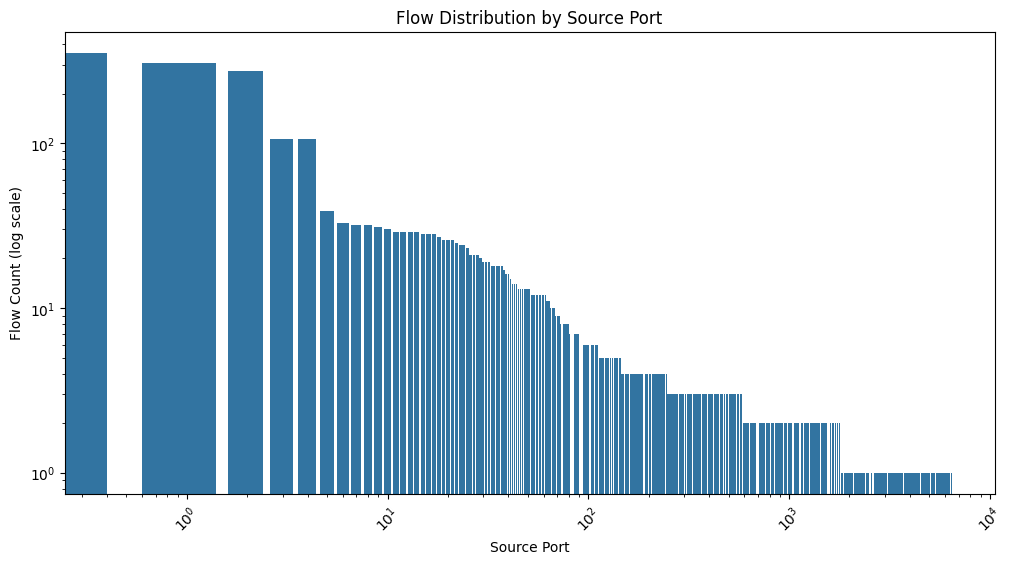

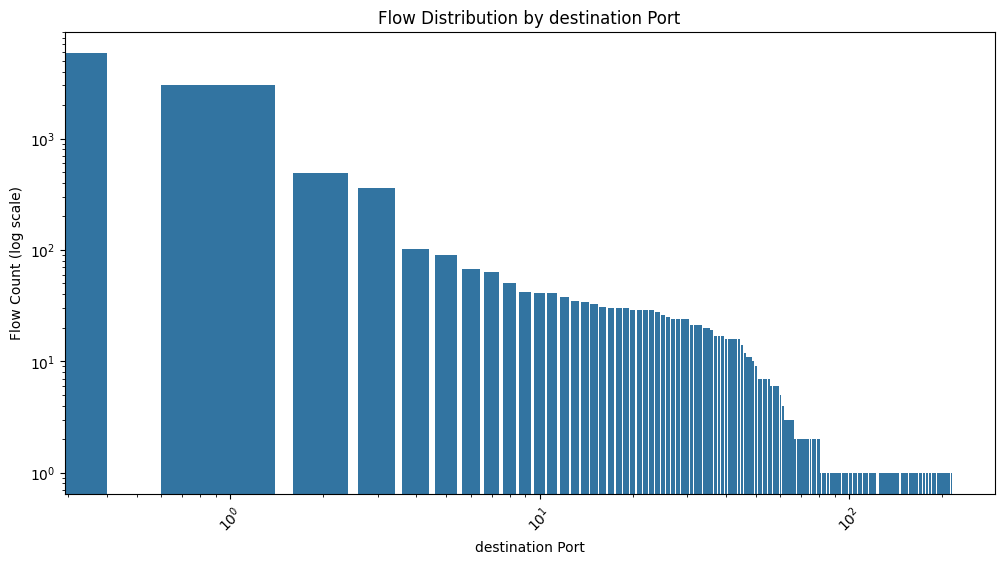

In [2]:
#2.1 (taking analysis of 1.4 and 1.5)
#(1.4 ANALYSIS)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your large dataset is stored in a CSV file (replace 'your_large_file.csv' with the actual path)
FS2 = pd.read_csv('FS2.csv')

# Convert timestamps to datetime objects
FS2['first'] = pd.to_datetime(FS2['first'], unit='s')
FS2['latest'] = pd.to_datetime(FS2['latest'], unit='s')

# Visualize flow distribution by source port
plt.figure(figsize=(12, 6))
sns.countplot(x='sport', data=df, order=FS2['sport'].value_counts().index)
plt.title('Flow Distribution by Source Port')
plt.xlabel('Source Port')
plt.ylabel('Flow Count (log scale)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.xscale('log')
plt.show()

# Visualize flow distribution by destination port
plt.figure(figsize=(12, 6))
sns.countplot(x='dport', data=df, order=FS2['dport'].value_counts().index)
plt.title('Flow Distribution by destination Port')
plt.xlabel('destination Port')
plt.ylabel('Flow Count (log scale)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.xscale('log')
plt.show()


first
2017-04-12 00:32:00    1
2017-04-12 00:33:00    0
2017-04-12 00:34:00    0
2017-04-12 00:35:00    0
2017-04-12 00:36:00    0
Freq: T, Name: Volume, dtype: int64
first
2017-04-12 00:30:00    1
2017-04-12 00:35:00    0
2017-04-12 00:40:00    0
2017-04-12 00:45:00    0
2017-04-12 00:50:00    0
Freq: 5T, Name: Volume, dtype: int64


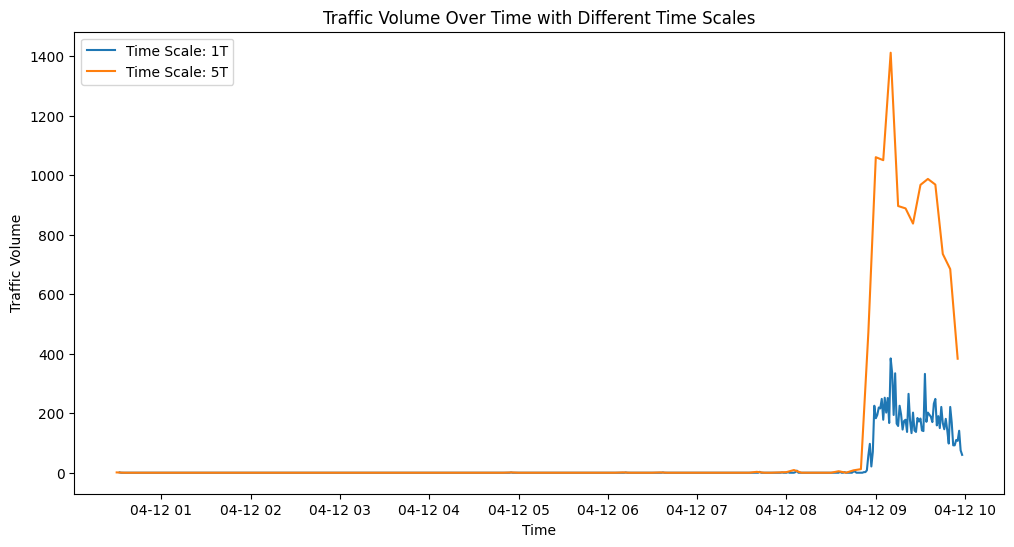

In [6]:
#(1.5 ANALYSIS)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FS2 = pd.read_csv('FS2.csv')

# Convert timestamps to datetime objects
FS2['first'] = pd.to_datetime(FS2['first'], unit='s')
FS2['latest'] = pd.to_datetime(FS2['latest'], unit='s')

# Create a DatetimeIndex
FS2.set_index(['first', 'latest'], inplace=True)

# Calculate traffic volume for each flow
FS2['Volume'] = 1 

# Reset the index before resampling
FS2_reset = FS2.reset_index()

# Resample the data for different time scales
time_scale1 = '1T'  # 1 minute
time_scale2 = '5T'  # 5 minutes

# Select only the 'Volume' column for summing
traffic_volume1 = FS2_reset.resample(time_scale1, on='first')['Volume'].sum()
traffic_volume2 = FS2_reset.resample(time_scale2, on='first')['Volume'].sum()

print(traffic_volume1.head())
print(traffic_volume2.head())

# Plot traffic volume over time with different time scales
plt.figure(figsize=(12, 6))

# Plot with the first time scale
sns.lineplot(x=traffic_volume1.index, y=traffic_volume1, label=f'Time Scale: {time_scale1}')

# Plot with the second time scale
sns.lineplot(x=traffic_volume2.index, y=traffic_volume2, label=f'Time Scale: {time_scale2}')

# Customize the plot
plt.title('Traffic Volume Over Time with Different Time Scales')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()
plt.close()


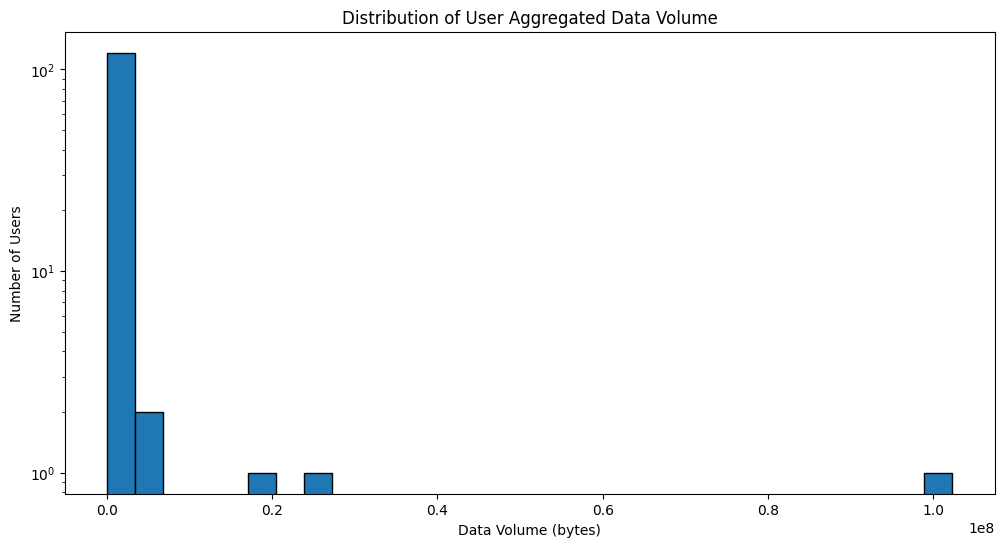

In [30]:
#2.2
# Convert timestamps to datetime objects
FS2['first'] = pd.to_datetime(FS2['first'], unit='s')

# Group by source IP and sum the data volume for each user
user_data_volume = FS2.groupby('src')['bytes'].sum()

# Plot histogram of user-aggregated data volume
plt.figure(figsize=(12, 6))
plt.hist(user_data_volume, bins=30, edgecolor='black')
plt.title('Distribution of User Aggregated Data Volume')
plt.xlabel('Data Volume (bytes)')
plt.ylabel('Number of Users')
plt.yscale('log')  # Use log scale for better visualization if the data is skewed
plt.show()

In [ ]:
#2.3
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
FS1 = pd.read_csv('FS1')

# Display information about the dataset
print(FS1.info())

# Check the distribution of IPv4 and IPv6 traffic
ipv4_count = FS1[FS1['src'].str.count(':') == 0].shape[0]
ipv6_count = FS1[FS1['src'].str.count(':') > 0].shape[0]

print(f"Number of IPv4 flows: {ipv4_count}")
print(f"Number of IPv6 flows: {ipv6_count}")

# Assuming 'num_flows_in_subnetwork' is the number of flows in your assigned subnetwork
num_flows_in_subnetwork = 11382 

# Sample IPv4 flows
sampled_ipv4_flows = FS1[FS1['src'].str.count(':') == 0].sample(n=num_flows_in_subnetwork, random_state=42)

# Sample IPv6 flows
sampled_ipv6_flows = FS1[FS1['src'].str.count(':') > 0].sample(n=num_flows_in_subnetwork, random_state=42)


MOST USED PORTS

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_700/3296901336.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_ports.index, y=top_5_ports.values, palette="viridis")


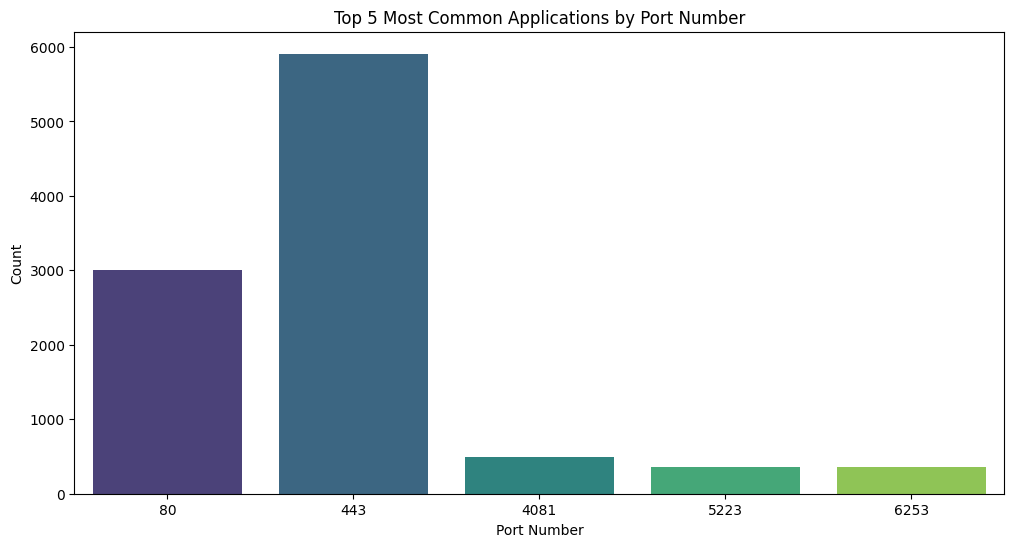

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Combine source and destination port numbers
all_ports = pd.concat([FS2['sport'], FS2['dport']], axis=0)

# Count the occurrences of each port number
port_counts = all_ports.value_counts()

# Select the top 5 most common applications
top_5_ports = port_counts.head(5)

# Plot the distribution of port numbers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_ports.index, y=top_5_ports.values, palette="viridis")
plt.title('Top 5 Most Common Applications by Port Number')
plt.xlabel('Port Number')
plt.ylabel('Count')
plt.show()


In [23]:
#2.3
import pandas as pd

# Define your header names
headers = ["src", "dst", "pro", "ok", "sport", "dport", "pkts", "bytes", "flows", "first", "latest"]

# Read CSV with headers
Soutputfile2 = pd.read_csv('Soutput_file2.csv', sep='\t', header=None, names=headers)

# Display the DataFrame
print(Soutputfile2.head())

# Save the DataFrame with headers to a new CSV file
Soutputfile2.to_csv('FS1.csv', index=False)


              src             dst  pro  ok  sport  dport  pkts  bytes  flows  \
0  203.246.146.19  91.229.213.143    1   1      8      0     1     32      1   
1  111.172.227.75      202.5.22.2    6   1    443  28568     2    104      1   
2  41.106.124.200   163.35.72.224    6   1   2942     22     1     40      1   
3  203.246.146.19   107.25.177.84    1   1      8      0     1     32      1   
4  134.122.172.23  203.246.146.19    1   1      0      0     1     32      1   

          first        latest  
0  1.491991e+09  1.491991e+09  
1  1.491988e+09  1.491988e+09  
2  1.491990e+09  1.491990e+09  
3  1.491989e+09  1.491989e+09  
4  1.491990e+09  1.491990e+09  


In [58]:
#2.3
import pandas as pd
import numpy as np
import ipaddress

FS1 = pd.read_csv('FS1.csv')

# Step 1: Separate IPv4 and IPv6 Flows
ipv4_flows = FS1[FS1['src'].apply(lambda x: '.' in x) & FS1['dst'].apply(lambda x: '.' in x)]
ipv6_flows = FS1[FS1['src'].apply(lambda x: ':' in x) & FS1['dst'].apply(lambda x: ':' in x)]

# Step 2: Filter Flows Based on Assigned Subnetwork
assigned_subnetwork_ipv4 = "163.35.139.0/24"
assigned_subnetwork_ipv6 = "2001:867f:cac1:d08c::/64"

ip_network_ipv4 = ipaddress.IPv4Network(assigned_subnetwork_ipv4, strict=False)
ip_network_ipv6 = ipaddress.IPv6Network(assigned_subnetwork_ipv6, strict=False)

# Apply the function to filter flows
subnetwork_flows_ipv4 = ipv4_flows[(ipv4_flows['src'].apply(lambda x: ipaddress.IPv4Address(x) in ip_network_ipv4)) |
                                    (ipv4_flows['dst'].apply(lambda x: ipaddress.IPv4Address(x) in ip_network_ipv4))]

subnetwork_flows_ipv6 = ipv6_flows[(ipv6_flows['src'].apply(lambda x: ipaddress.IPv6Address(x) in ip_network_ipv6)) |
                                    (ipv6_flows['dst'].apply(lambda x: ipaddress.IPv6Address(x) in ip_network_ipv6))]

# Print diagnostic information
print("Number of flows in IPv4 data:", len(ipv4_flows))
print("Number of flows in IPv6 data:", len(ipv6_flows))
print("Number of flows in the assigned subnetwork (IPv4):", len(subnetwork_flows_ipv4))
print("Number of flows in the assigned subnetwork (IPv6):", len(subnetwork_flows_ipv6))

# Display the results
if len(subnetwork_flows_ipv4) == 0 or len(subnetwork_flows_ipv6) == 0:
    print("No flows found in the specified subnetworks.")
else:
    # Step 3: Random Sampling
    num_flows_to_sample = len(subnetwork_flows_ipv4)  # Assuming the same number for both IPv4 and IPv6
    random_sample_ipv4 = subnetwork_flows_ipv4.sample(n=num_flows_to_sample, random_state=42)
    random_sample_ipv6 = subnetwork_flows_ipv6.sample(n=num_flows_to_sample, random_state=42)

    # Display the results
    print("Randomly Sampled IPv4 Flows:")
    print(random_sample_ipv4)

    print("\nRandomly Sampled IPv6 Flows:")
    print(random_sample_ipv6)


Number of flows in IPv4 data: 4960
Number of flows in IPv6 data: 40
Number of flows in the assigned subnetwork (IPv4): 2
Number of flows in the assigned subnetwork (IPv6): 3
Randomly Sampled IPv4 Flows:
                src             dst  pro  ok  sport  dport  pkts  bytes  \
4934  163.35.139.18  157.56.126.171   17   1  64984  40026     2    131   
4263   52.65.228.63  163.35.139.123    6   1    443  53082     9   5425   

      flows         first        latest  
4934      1  1.491988e+09  1.491988e+09  
4263      1  1.491990e+09  1.491990e+09  

Randomly Sampled IPv6 Flows:
                                          src  \
166   2610:82bf:6ff5:3ca3:e162:33e7:fcff:fc1e   
2133    2400:84f0:feff:5c:1ffc:f3fe:1c00:41a3   

                                          dst  pro  ok  sport  dport  pkts  \
166   2001:867f:cac1:d08c:3e3d:3018:6307:81fd   17   1     53   5848     1   
2133  2001:867f:cac1:d08c:3e3d:3018:6307:81fd   17   1     53  65498     1   

      bytes  flows         first

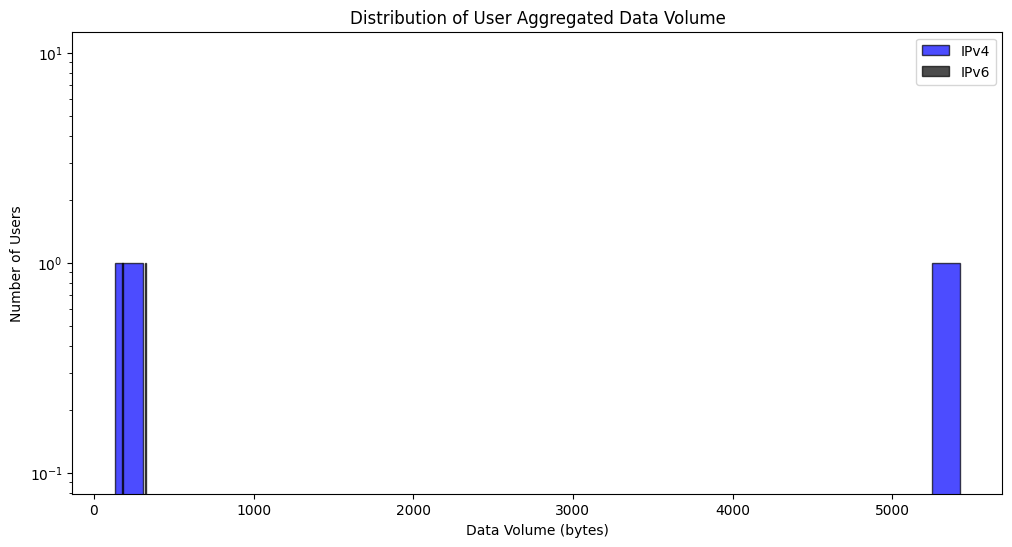

In [67]:
import pandas as pd
import numpy as np
import ipaddress
import matplotlib.pyplot as plt

# Convert timestamps to datetime objects
random_sample_ipv4['first'] = pd.to_datetime(random_sample_ipv4['first'], unit='s')
random_sample_ipv6['first'] = pd.to_datetime(random_sample_ipv6['first'], unit='s')

# Group by source IP and sum the data volume for each user for IPv4
user_data_volume_ipv4 = random_sample_ipv4.groupby('src')['bytes'].sum()

# Group by source IP and sum the data volume for each user for IPv6
user_data_volume_ipv6 = random_sample_ipv6.groupby('src')['bytes'].sum()

# Plot histogram of user-aggregated data volume for IPv4 and IPv6
plt.figure(figsize=(12, 6))
plt.hist(user_data_volume_ipv4, bins=30, edgecolor='black', alpha=0.7, color='blue', label='IPv4')
plt.hist(user_data_volume_ipv6, bins=50, edgecolor='black', alpha=0.7, color='black', label='IPv6')
plt.title('Distribution of User Aggregated Data Volume')
plt.xlabel('Data Volume (bytes)')
plt.ylabel('Number of Users')
plt.yscale('log')  # Use log scale for better visualization if the data is skewed
plt.legend()
plt.show()
